In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm

In [20]:
df = pd.read_excel('/content/Final data.xlsx')
print(df.columns)
df.sample(5)

Index(['Course', 'Gender', 'Age', 'Year', 'Reason', 'County of residence',
       'Place of residence ', 'Tribe'],
      dtype='object')


,Course,Gender,Age,Year,Reason,County of residence,Place of residence,Tribe
196,BTAP,M,22,3,Health,Kericho,Tudor,Borana
187,BTAP,M,22,2,Discipline,Machakos,KC,Turkana
74,BSSC,M,26,5,Graduated,Nandi,KC,Pokomo
159,BTAP,M,23,5,Graduated,Taita Taveta,Kisauni,Tharaka
64,BSSC,M,27,5,Graduated,Marsabit,Mwembe,Luo


## Non-graphical EDA

In [6]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Course               202 non-null    object
 1   Gender               202 non-null    object
 2   Age                  202 non-null    int64 
 3   Year                 202 non-null    int64 
 4   Reason               202 non-null    object
 5   County of residence  202 non-null    object
 6   Place of residence   202 non-null    object
 7   Tribe                202 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.8+ KB


(None, (202, 8))

* 202 rows, 8 columns.
* No null values.
* 2 numerical variables ~ **Age** and **Year**
* 6 categorical variables:
    * covariates : **course, gender, county, place of residence, Reasons.**


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Course,202,4,BSSC,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,202,2,M,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,202,NaN,NaN,NaN,23.9505,2.15275,17,23,24,25,28
Year,202,NaN,NaN,NaN,4.18812,1.27909,1,3,5,5,5
Reason,202,5,Graduated,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County of residence,202,47,Kericho,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Place of residence,202,6,KC,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tribe,202,33,Gusii,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.groupby('Gender')['Reason'].value_counts().to_frame()

Reason
Gender Reason            
F      Graduated       43
       Health           7
       Academics        4
       Finance          4
       Discipline       1
M      Graduated       94
       Health          18
       Discipline      16
       Finance          9
       Academics        6

In [15]:
df.groupby('Course')['Reason'].value_counts().to_frame()

Reason
Course Reason            
BMCS   Graduated       37
       Discipline       3
       Health           3
       Finance          1
BSSC   Graduated       39
       Health           7
       Academics        4
       Finance          4
       Discipline       3
BTAP   Graduated       24
       Health          12
       Discipline       9
       Academics        5
       Finance          5
BTRE   Graduated       37
       Finance          3
       Health           3
       Discipline       2
       Academics        1

In [22]:
df.groupby('County of residence')['Reason'].value_counts().to_frame()

Reason
County of residence Reason            
Baringo             Graduated        4
                    Discipline       1
Bomet               Graduated        2
Bungoma             Discipline       1
                    Graduated        1
...                                ...
West Pokot          Graduated        2
                    Academics        1
                    Finance          1
                    Health           1
kisii               Graduated        1

[101 rows x 1 columns]

In [21]:
df.groupby('Place of residence ')['Reason'].value_counts().to_frame()

Reason
Place of residence  Reason            
Changamwe           Graduated       13
                    Discipline       2
                    Finance          2
                    Academics        1
KC                  Graduated       29
                    Health           7
                    Discipline       3
                    Academics        2
                    Finance          2
Kisauni             Graduated       27
                    Health           4
                    Academics        3
                    Discipline       3
                    Finance          2
Mishomoroni         Graduated       29
                    Discipline       4
                    Health           4
                    Academics        3
                    Finance          3
Mwembe              Graduated       11
                    Health           4
                    Discipline       3
                    Finance          1
Tudor               Graduated       28
                    Health           6
                    Finance          3
                    Discipline       2
                    Academics        1

In [23]:
df.groupby('Tribe')['Reason'].value_counts().to_frame()

Reason
Tribe   Reason            
Akamba  Graduated        6
        Health           2
        Finance          1
Boni    Health           1
Borana  Graduated        3
...                    ...
Tugen   Discipline       1
        Health           1
Turkana Graduated        4
        Discipline       1
        Health           1

[86 rows x 1 columns]

In [24]:
df.groupby('Age')['Reason'].value_counts().to_frame()

Reason
Age Reason            
17  Discipline       1
18  Academics        1
    Discipline       1
    Health           1
19  Academics        3
    Finance          1
20  Finance          3
    Discipline       1
21  Academics        3
    Discipline       2
    Finance          2
    Graduated        2
    Health           1
22  Graduated       14
    Health           8
    Discipline       2
    Finance          2
23  Graduated       20
    Health           6
    Discipline       2
    Academics        1
    Finance          1
24  Graduated       30
    Health           4
    Finance          3
    Discipline       1
25  Graduated       31
    Health           3
    Academics        1
    Discipline       1
26  Graduated       24
    Discipline       3
    Health           2
    Academics        1
    Finance          1
27  Graduated        9
    Discipline       2
28  Graduated        7
    Discipline       1

In [25]:
df.groupby('Year')['Reason'].value_counts().to_frame()

Reason
Year Reason            
1    Academics        5
     Discipline       2
     Finance          1
2    Health           9
     Discipline       7
     Finance          7
     Academics        3
3    Health          11
     Discipline       5
     Finance          5
     Academics        2
4    Health           5
     Discipline       3
5    Graduated      137

## Graphical Analysis


 mu = 23.95 and sigma = 2.15



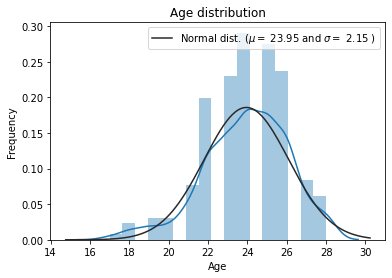

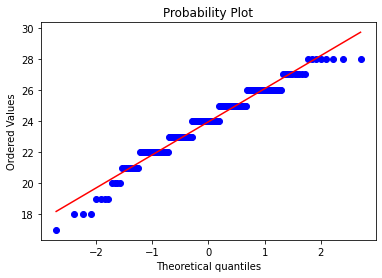

In [28]:
sns.distplot(df['Age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Age distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)
plt.show()


 mu = 4.19 and sigma = 1.28



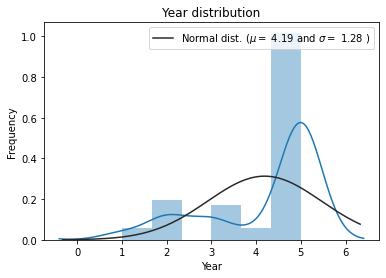

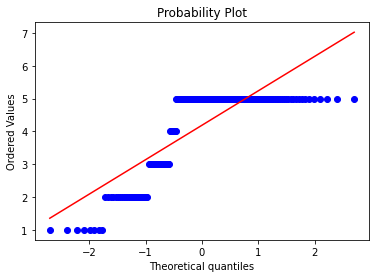

In [29]:
sns.distplot(df['Year'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Year'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Year distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Year'], plot=plt)
plt.show()

Text(0.5, 1.0, 'Reasons distribution across the Years')

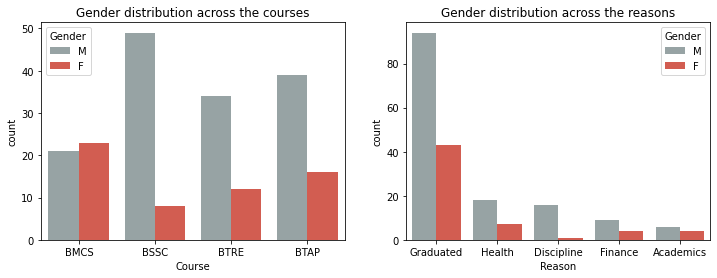

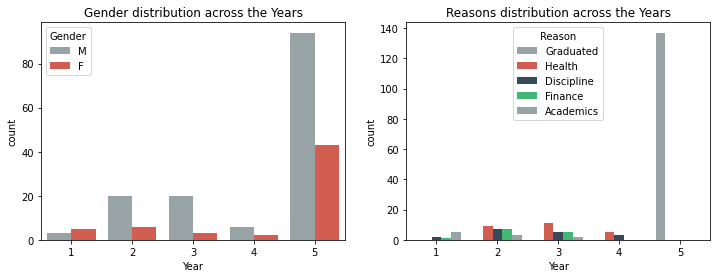

In [47]:
# holidays + no_holidays
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.countplot(x="Course",hue="Gender",data=df, ax = axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Gender distribution across the courses')
sns.countplot(x="Reason",hue="Gender",data=df, ax = axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Gender distribution across the reasons')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x="Year",hue="Gender",data=df, ax = axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Gender distribution across the Years')
sns.countplot(x="Year",hue="Reason",data=df, ax = axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Reasons distribution across the Years')

In [35]:
df.columns

Index(['Course', 'Gender', 'Age', 'Year', 'Reason', 'County of residence',
       'Place of residence ', 'Tribe'],
      dtype='object')

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x="Year",hue="Gender",data=df, ax = axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Gender distribution across the Years')
sns.countplot(x="Year",hue="Reason",data=df, ax = axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Reasons distribution across the Years')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x="Year",hue="Gender",data=df, ax = axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Gender distribution across the Years')
sns.countplot(x="Year",hue="Reason",data=df, ax = axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]).set_title('Reasons distribution across the Years')

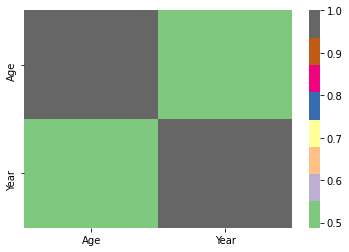

In [46]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Accent')